# Project Title : Sales Prediction :                                Predicting sales of a major store chain Rossmann

## Problem Description

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## Data Description

Rossmann Stores Data.csv- historical data including Sales            
store.csv - supplemental information about the stores

### Data fields

Most of the fields are self-explanatory. The following are descriptions for those that aren't.   
   1) Id - an Id that represents a (Store, Date) duple within the test set
   
   2) Store - a unique Id for each store
   
   3) Sales - the turnover for any given day (this is what you are predicting)
   
   4) Customers - the number of customers on a given day
   
   5) Open - an indicator for whether the store was open: 0 = closed, 1 = open
   
   6) StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
   
  7) SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
  
  8) StoreType - differentiates between 4 different store models: a, b, c, d
  
  9) Assortment - describes an assortment level: a = basic, b = extra, c = extended
  
  10) CompetitionDistance - distance in meters to the nearest competitor store
  
  11) CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
  
  12) Promo - indicates whether a store is running a promo on that day
  
  13) Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
  
  14) Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
  
  15) PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### “You can have data without information, but you cannot have information without data.”  -- by Daniel Keys Moran,

2 datasets have been provided for this task. One has the general information on the month over month sales for various stores of Dirk Rossmann GmbH. The other has the supplementary information on each store of the company.

The author of this notebook uses features from both the datasets.

### *Importing The Necessary Libaries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from matplotlib import style
style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = (15,10)  # To increase the Figure size of all graph
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [3]:
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [4]:
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
import statsmodels.api as sm
from statsmodels.imputation import mice

### Importing and checking the Dataset

In [6]:
df=pd.read_csv(r"RossmannSalesData.csv")
stores=pd.read_csv(r"store_data.csv")

C:\Users\win11\AppData\Local\Temp\ipykernel_6556\1005572941.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"RossmannSalesData.csv")


In [7]:
df.head() # this is the Rossmann Sales Dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
stores.head() # This is the Store dataset

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
print(f"The shape of the Rossmann Sales Data is : {df.shape}")
print(f"The shape of the Rossmann Store Data is : {stores.shape}")

The shape of the Rossmann Sales Data is : (1017209, 9)
The shape of the Rossmann Store Data is : (1115, 10)


In [10]:
print("----------The Null Value present in the Sales Data is----------")
print(df.isnull().sum())
print('-'*79)
print("----------The Null Value present in the Stores Data is----------")
print(stores.isnull().sum())

----------The Null Value present in the Sales Data is----------
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
-------------------------------------------------------------------------------
----------The Null Value present in the Stores Data is----------
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


Observation:
      
       1) Since there is no Null value present in the Sales Dataset which is very good.
       2) But there is a very Null value present in the Store Dataset So i will Check the Percentace of Nall Value in Store Dataset.

What to do now:
     
      1) I will get the percentage of Null Value in the Store Dataset For convieniences

In [11]:
stores.isnull().mean() * 100   #-- Percentge of NUll Value in the Store data

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

Observation:
   
    1) From the above recored it was find that there are nearly 48.7% of Null value in the Promo2SinceWeek, Promo2SinceYear, PromoInterval in the Store Dataset.
    2) Whereas there are 31.74% Null value in the CompetitionOpenSinceMonth, CompetitionOpenSinceYear in the Store Dataset.

What to do now:

    1) I will remove the Null value in the later stages.
    2) Now i will go for Sales Data.

# *Sales Data*

We will Discuss each dataset one by one.Beginning with sales dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [13]:
# change the dtype of Date as it is object 
df["Date"]=pd.to_datetime(df["Date"])

In [14]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Observation:

     All the variable except "Date" and "StateHoliday" are in Object.
     
Note that:

     It seen the datatype of the SchoolHoliday is in "int64" whereas SchoolHoliday is a Categorical Feature should be in (Yes/no or 1/0).So, in further we will check for it.
     
What to do now:
          
        Now,we should analyze each variable one by one of Sales Dataset.

## Univariate Analysis of Sales 

In [15]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

### 1. Day Of Week

In [16]:
print(df["DayOfWeek"].value_counts().sort_index())
print("-"*35)
print(df["DayOfWeek"].value_counts(normalize=True).sort_index())

1    144730
2    145664
3    145665
4    145845
5    145845
6    144730
7    144730
Name: DayOfWeek, dtype: int64
-----------------------------------
1    0.142281
2    0.143200
3    0.143201
4    0.143378
5    0.143378
6    0.142281
7    0.142281
Name: DayOfWeek, dtype: float64


Observation:

     1) It is for weeks are more like categories than counts. Whether or not to use it as categorical will certainly be the question at hand in the hereafter. So, we'll explore the variable as it is.
     
     2) From the above description, it is evident that each day of the week is equally likely in the dataset.

C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(144500.0, 146000.0)

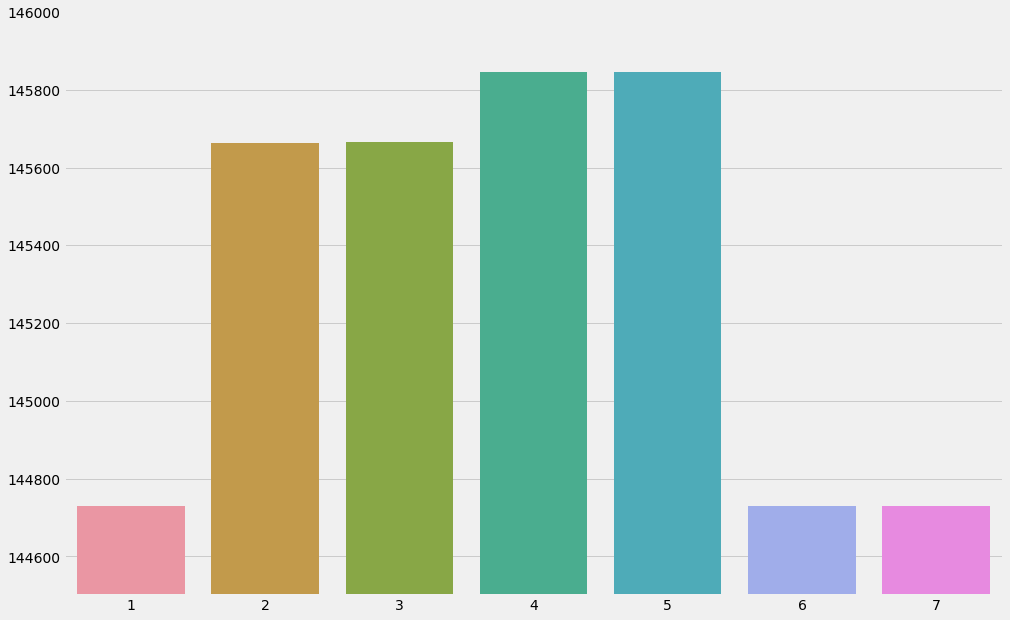

In [19]:
x=df["DayOfWeek"].value_counts().sort_index().index
y=df["DayOfWeek"].value_counts().sort_index().values

sns.barplot(x,y)
plt.ylim([144500, 146000])  # Here i use plt.ylim it mean the bootom value and the upper value
                            # take it from the above output lowest and upper value

Observation:

       The bar graph above capture the slight changes in frequency of each week.The graph should not be taken as it is because the scale of y-axis doesn't begin at zero. So,The Difference would not be apparent otherwise.

## 2. Customer

What To do now:

          The Dataset has more than 1 million records.So,Describing the dataset in the 5 Number Summary. But we will use along with the 12.5th &       87.5 percentile.

In [20]:
print(df["Customers"].describe())
print("-"*40)
print(df["Customers"].describe(percentiles=[0.125,0.25,0.5,0.75,0.875]))

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64
----------------------------------------
count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
12.5%    0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
87.5%    1.046000e+03
max      7.388000e+03
Name: Customers, dtype: float64


Observation:
    
    1) From the summaries above, the 5 number summary depicts that the minimum is zero and that the bottom 25% of the data consists of the no. of customers that are not more than 405.
    
    2) The 7 numarry summary says that not only the minimum value but all of the bottom 12.5% of customers are 0.

In [21]:
print("The No. of Zeroes in Customer: ",df[df["Customers"] == 0].value_counts().sum())
print("The Total No. of data in customer: ",df["Customers"].count())

The No. of Zeroes in Customer:  172869
The Total No. of data in customer:  1017209


Observation:

     1) It seen that Out of 1017209 data 172869 are the 0 in the Customer       Features.

In [22]:
df[df['Customers'] > 0]['Customers'].max() / df[df['Customers'] > 0]['Customers'].min()

2462.6666666666665

<AxesSubplot:xlabel='Customers', ylabel='Count'>

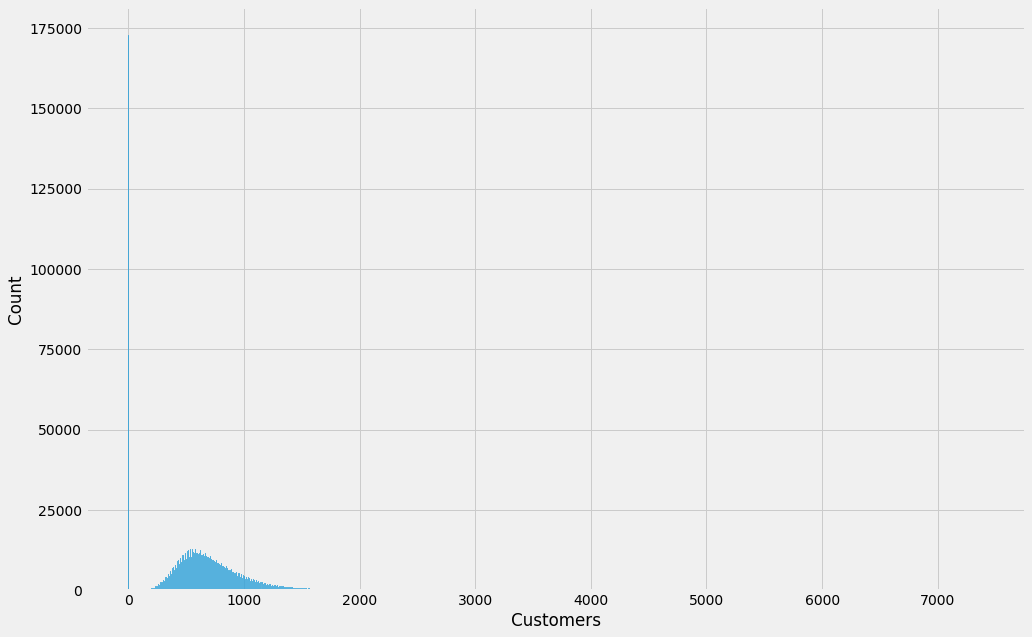

In [23]:
sns.histplot(x=df["Customers"])

<AxesSubplot:xlabel='Customers', ylabel='Count'>

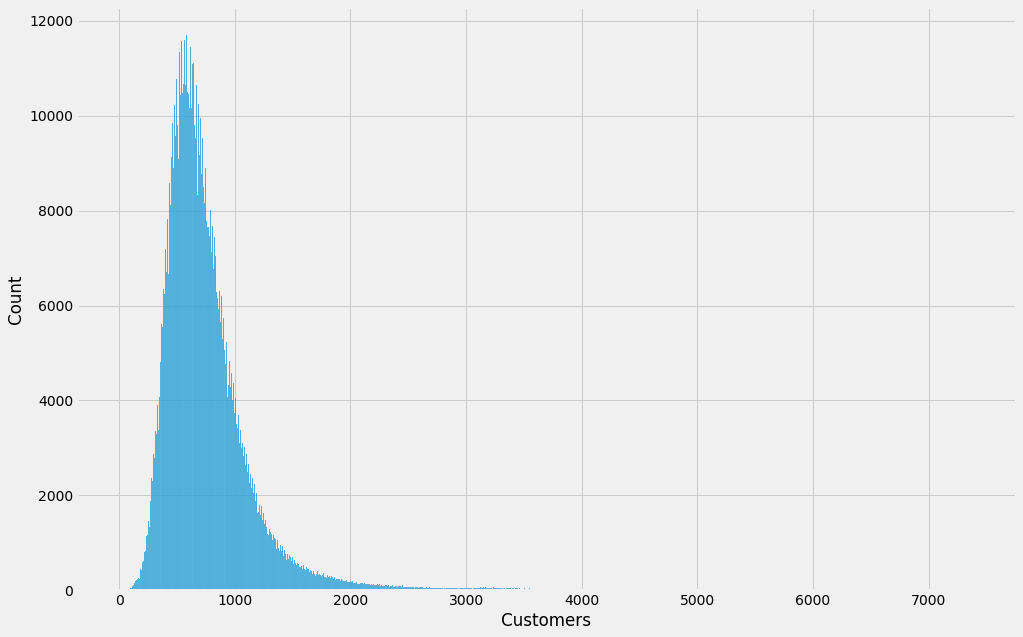

In [24]:
sns.histplot(x= df[df["Customers"]>0]["Customers"])

Observation:

    After removing the Zeroes,the rset of the distrinution in the customers look like Fairly gaussian but with a right skewness.

In [25]:
df[df["Customers"] > 0]["Customers"].describe()

count    844340.000000
mean        762.775369
std         401.195377
min           3.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

Observation:

      The 50% of the value are centered between 519 and 893.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


## 3. Open

Note:
 
    Open is a categorical Variable which say that wheather the it open or not in that particular day and contains categorical value of  0 and 1. In open 1 state that the Store is open whereas 0 for store is not open.
    {0 = Store is Closed,
     1 = Store is Open}

In [27]:
print("The Total no. of Time to open--",df["Open"].count())
print()
print("Out of which the no. of Store Open as 1 and closed as 0")
print(df["Open"].value_counts())
print("-"*40)
print("----------- After Normalize as True ---------------")
print(df["Open"].value_counts(normalize=True))

The Total no. of Time to open-- 1017209

Out of which the no. of Store Open as 1 and closed as 0
1    844392
0    172817
Name: Open, dtype: int64
----------------------------------------
----------- After Normalize as True ---------------
1    0.830107
0    0.169893
Name: Open, dtype: float64


In [28]:
# in Open catogories the day closed (0) with the Day of week
df[df["Open"] == 0]["DayOfWeek"].value_counts().sort_values()

6       672
2      1703
3      3729
1      7170
5      7205
4     11201
7    141137
Name: DayOfWeek, dtype: int64

Observation:

     It seen that on the 7th day of week that is Sunday the Store is Closed with a higest number.

In [29]:
df[df["Open"] == 1]["DayOfWeek"].value_counts().sort_values()

7      3593
4    134644
1    137560
5    138640
3    141936
2    143961
6    144058
Name: DayOfWeek, dtype: int64

Observation:

    It noticed that on the 6th day of the week that is on Saturday the stored is openwith the higest number.

## 4. Promo

Note:

    1) Here Promo indicates that wheather on that day the Store is running on promo or not.
    {0 = No Promo,
     1 = Promo}
    
    2) Promo is also a Catogorical feature

In [30]:
print(df["Promo"].value_counts())
print("-"*35)
print(df["Promo"].value_counts(normalize=True))

0    629129
1    388080
Name: Promo, dtype: int64
-----------------------------------
0    0.618485
1    0.381515
Name: Promo, dtype: float64


Now lets compare it the Promo with the Day of Week and let's Check 

In [31]:
print("-------- Doing Promo ---------")
print(df[df["Promo"] == 1]["DayOfWeek"].value_counts().sort_values())
print()
print("--------- Not Doing Promo --------")
print(df[df["Promo"] == 0]["DayOfWeek"].value_counts().sort_values())

-------- Doing Promo ---------
5    77580
4    77580
3    77580
2    77580
1    77760
Name: DayOfWeek, dtype: int64

--------- Not Doing Promo --------
1     66970
2     68084
3     68085
5     68265
4     68265
7    144730
6    144730
Name: DayOfWeek, dtype: int64


Observation:

       1) From the above detail it was to know that on the Promotion is
       equally scheduled in any week of months.
       
       2) There is very less promo on Saturaday and there is no much promo   on Sunday as on that day there is very high chances that the stored is    closed

## 5. State Holiday

In [32]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [33]:
print(df["StateHoliday"].value_counts())
print("-"*30)
print(df["StateHoliday"].value_counts(normalize=True))

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
------------------------------
0    0.840621
0    0.128855
a    0.019917
b    0.006577
c    0.004031
Name: StateHoliday, dtype: float64


Observation:

       1) It is also a categorical Feature which have 4 categories.
       
       2) From the data we get to know that 96% {(0+0) or (0.84+0.12)} is    not having state holiday so only the 4% are having State Holiday which are(a,b,c).

## 6. School Holiday

In [34]:
print(df["SchoolHoliday"].value_counts())
print("-"*32)
print(df["SchoolHoliday"].value_counts(normalize=True))

0    835488
1    181721
Name: SchoolHoliday, dtype: int64
--------------------------------
0    0.821353
1    0.178647
Name: SchoolHoliday, dtype: float64


Observation:

    It is binary categorical variable split in 82% : 18% with the majority shared by no school holiday

## 7. Sales

what to do:

     We will the same Percentile to describe the "Sales" variable that we did it for describing the "Customers" Variable for the reason and we will also check for the data 0 in it.

In [35]:
print(df["Sales"].describe())
print("-"*40)
print(df["Sales"].describe(percentiles = [0.125,0.25,0.5,0.75,0.875]))

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64
----------------------------------------
count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
12.5%    0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
87.5%    9.707000e+03
max      4.155100e+04
Name: Sales, dtype: float64


observation:

      For the Sales Feature also there is a 0 and it consists of atleast 12.5%.So,we sholud have a huge peak at zero 

<AxesSubplot:xlabel='Sales', ylabel='Count'>

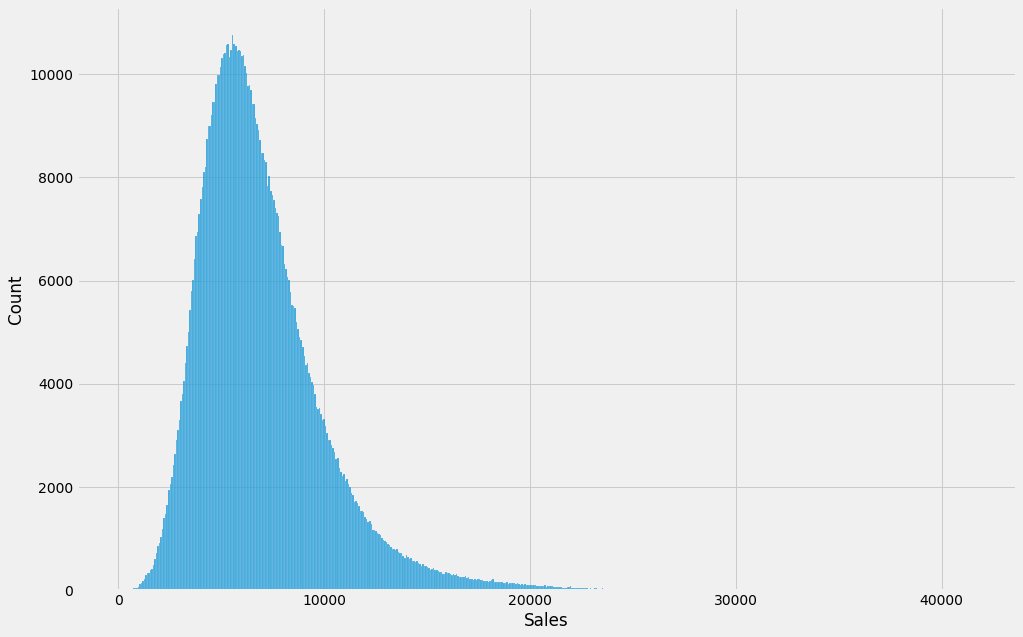

In [36]:
sns.histplot(x=df[df["Sales"] > 0]["Sales"])

Observation:

       The Histogram on the raw doesn't revel much of what is hidden. So, a log re-expression would be subservient for this variable too.

<AxesSubplot:xlabel='Sales', ylabel='Count'>

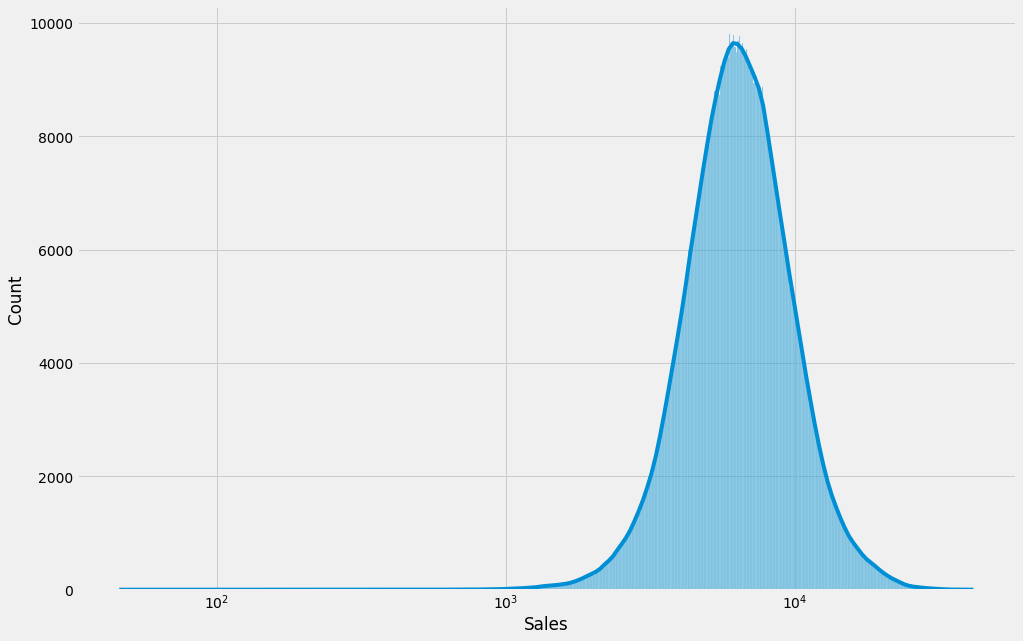

In [37]:
sns.histplot(x = df[df['Sales'] > 0]['Sales'], log_scale = True,kde=True)

What does the analysis suggest?

    'Sales' should be looked at as a target or outcome variable than as any other variable. From that perspective, the pattern in the rest of the data - where sales is greater than 0 - deserves special attention. Look at its distribution with the zeros included. This kind of a distribution is zero-inflated. It is because, not only is there a peak at zero, but the rest of the data demonstrates a different distribution. This might affect the model - most probably an OLS. So, we'll come to it later.

<AxesSubplot:xlabel='Sales', ylabel='Count'>

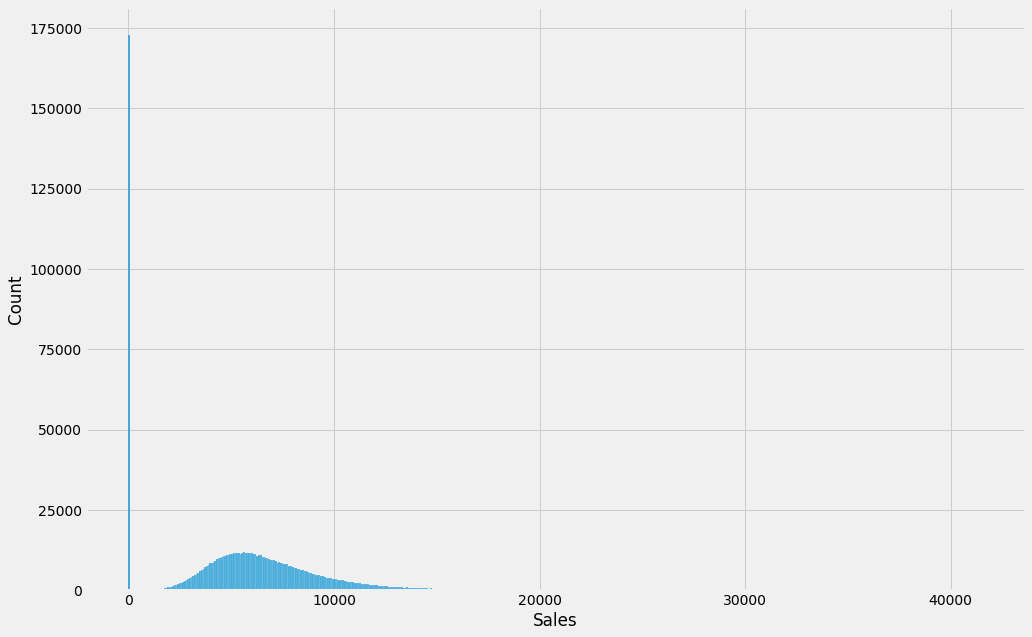

In [38]:
## Distribution of sales data including the zeros

sns.histplot(x = df['Sales'])

# Bivariate Analysis

## 1. Customer Vs Sales

Text(0, 0.5, 'Sales')

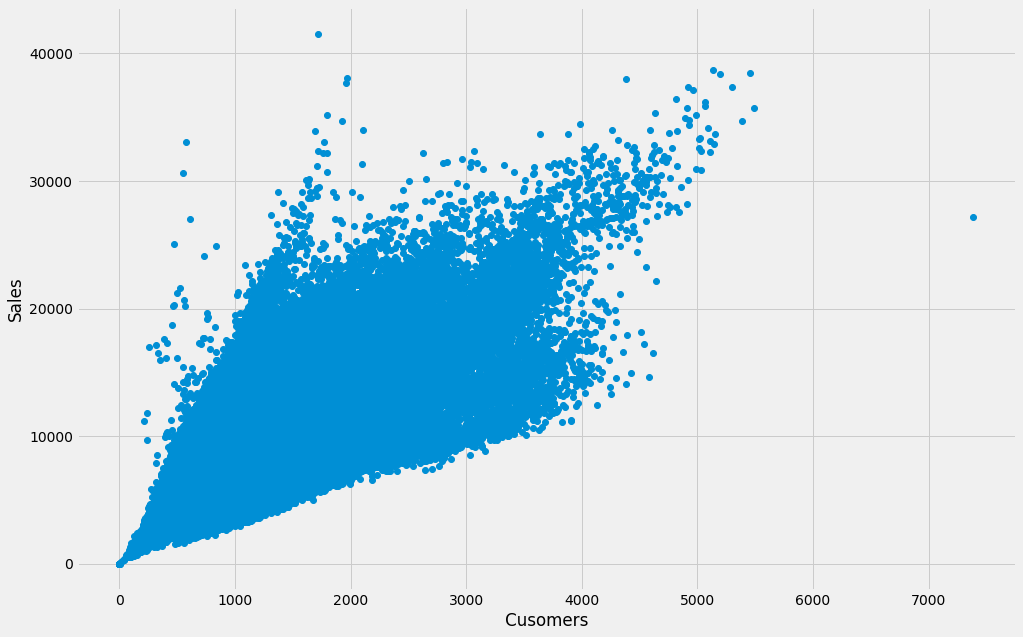

In [39]:
plt.plot(df["Customers"], df["Sales"],'o')
plt.xlabel("Cusomers")
plt.ylabel("Sales")

Note: 
         
       The Scatterplot has many overlapping points.Let's distill it. The Scatterplot below is what it looks like

Text(0, 0.5, 'Sales')

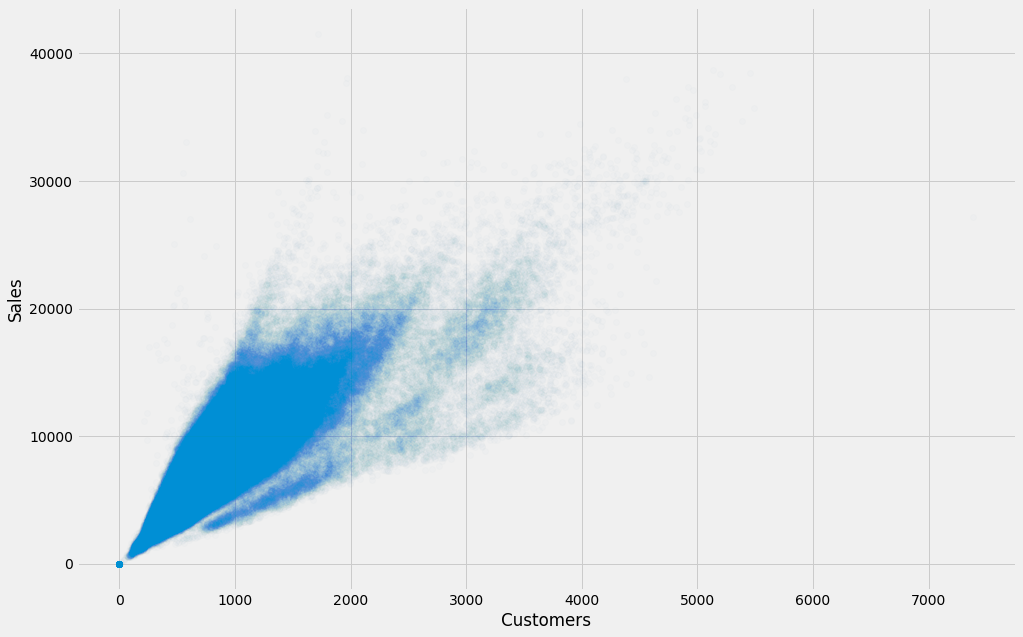

In [40]:
plt.plot(df["Customers"], df["Sales"], 'o',alpha=0.01)
plt.xlabel("Customers")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

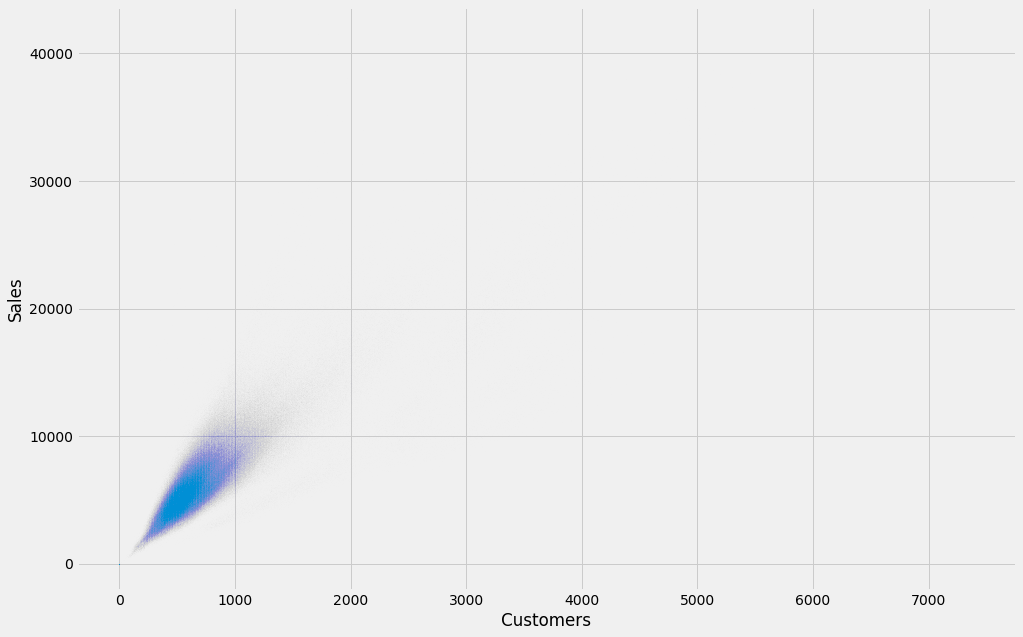

In [41]:
plt.plot(df["Customers"], df["Sales"], 'o',alpha=0.01,markersize=0.1)
plt.xlabel("Customers")
plt.ylabel("Sales")

Observation:

       1) Apparently, sales increase with an increase in the no. of customers.
       
What to do now:

        1) In order to 'linearize' the relationship between both these variables, we should analyze them on log scale as is shown below

Why we will use log:

      In statistics, log base 10 (log10) can be used to transform data to make positively skewed data more "normal" To account for curvature in a linear model. To stabilize variation within groups.

Text(0, 0.5, 'Sales')

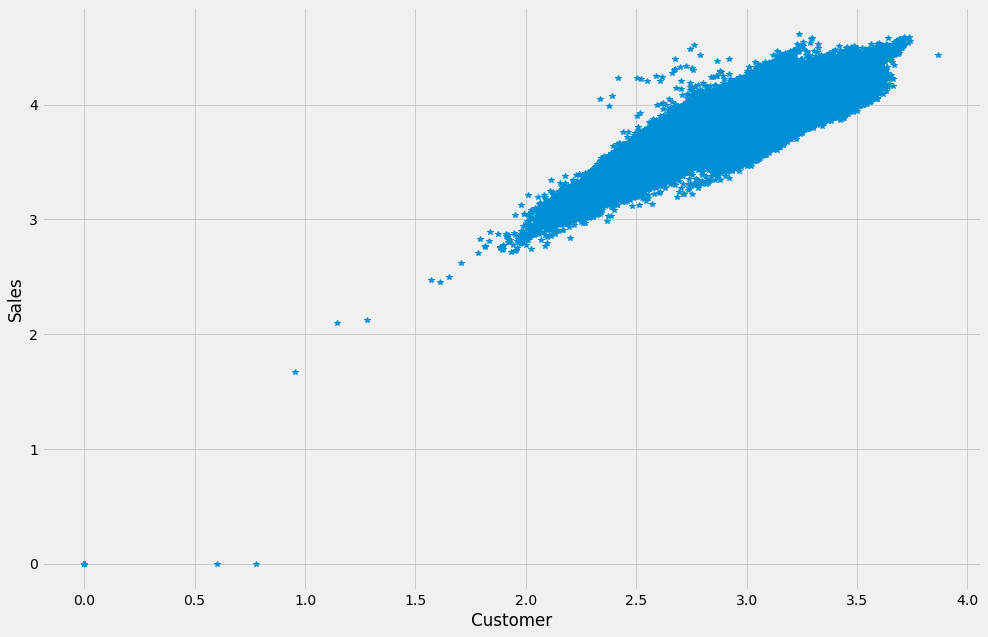

In [42]:
plt.plot(np.log10(df["Customers"]+1), np.log10(df["Sales"]+1),'*')
plt.xlabel("Customer")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

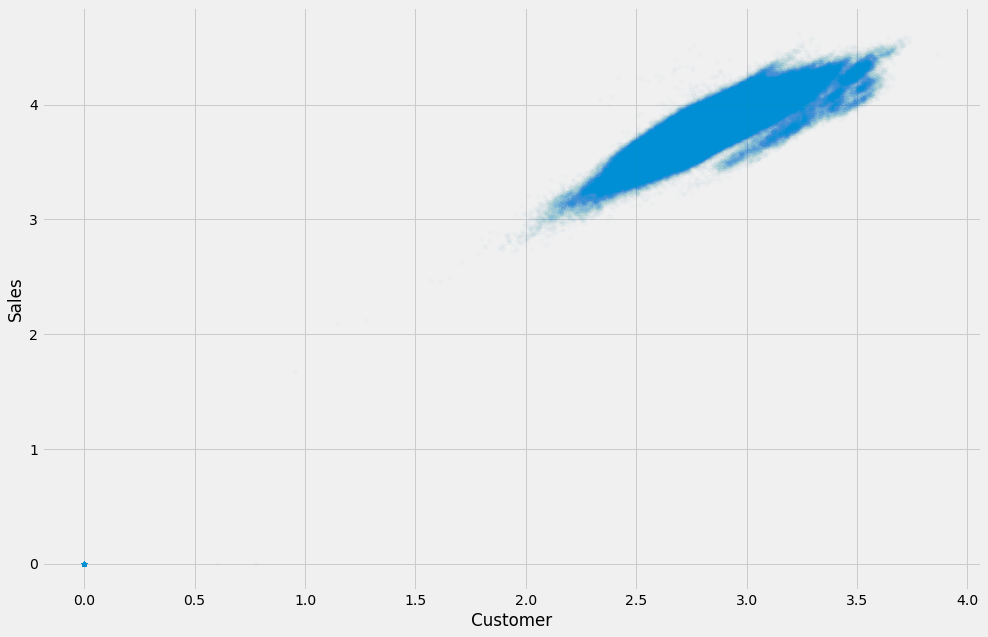

In [43]:
plt.plot(np.log10(df["Customers"]+1), np.log10(df["Sales"]+1),'*',alpha=0.01  )
plt.xlabel("Customer")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

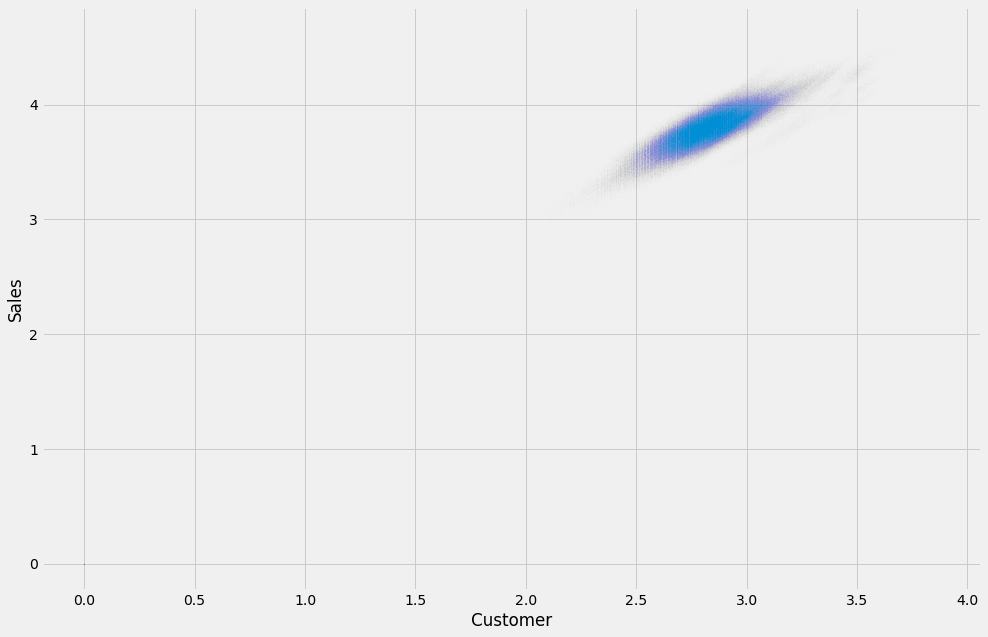

In [44]:
plt.plot(np.log10(df["Customers"]+1), np.log10(df["Sales"]+1),'*',alpha=0.01,markersize=0.08  )
plt.xlabel("Customer")
plt.ylabel("Sales")

Observation:
    
    The plot looks fairly straight with a bulge in the middle but. This bulge is because of the fact that log transformation makes these variables normally distributed.From the given data, it is clear that there's a strong positive correlation between the variables when re-expressed using logarithm.

In [45]:
df["Sales"].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

Observation:

        There are 172871 now of sales which are 0 so we have to removw the 0 in sale 

In [46]:
df.shape

(1017209, 9)

C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Sales')

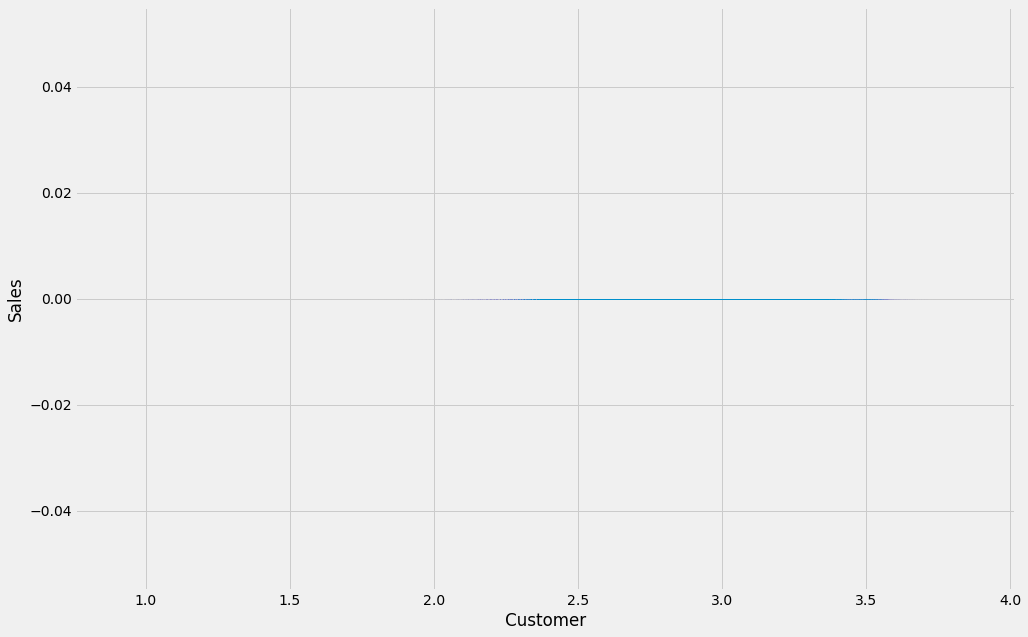

In [47]:
plt.plot(np.log10(df["Customers"]), np.log10(df["Sales"]>0),'*',alpha=0.01,markersize=0.08  )
plt.xlabel("Customer")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

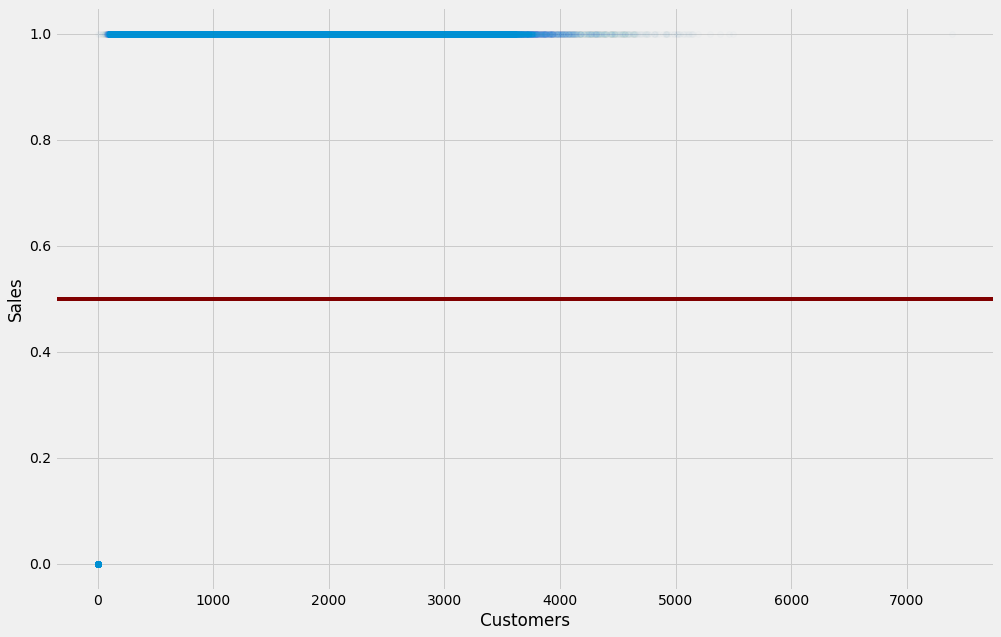

In [48]:
plt.plot(df["Customers"], df["Sales"]>0, 'o',alpha=0.01)
plt.axhline(y = 0.5, color = 'maroon')
plt.xlabel("Customers")
plt.ylabel("Sales")

## 2. Promo vs Sales

Note that:
    
    Promo is a categorical variable having 2 categories - 0 and 1. So, it requires a different kind of analysis with the "Sales" variable than that of its former counterpart

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

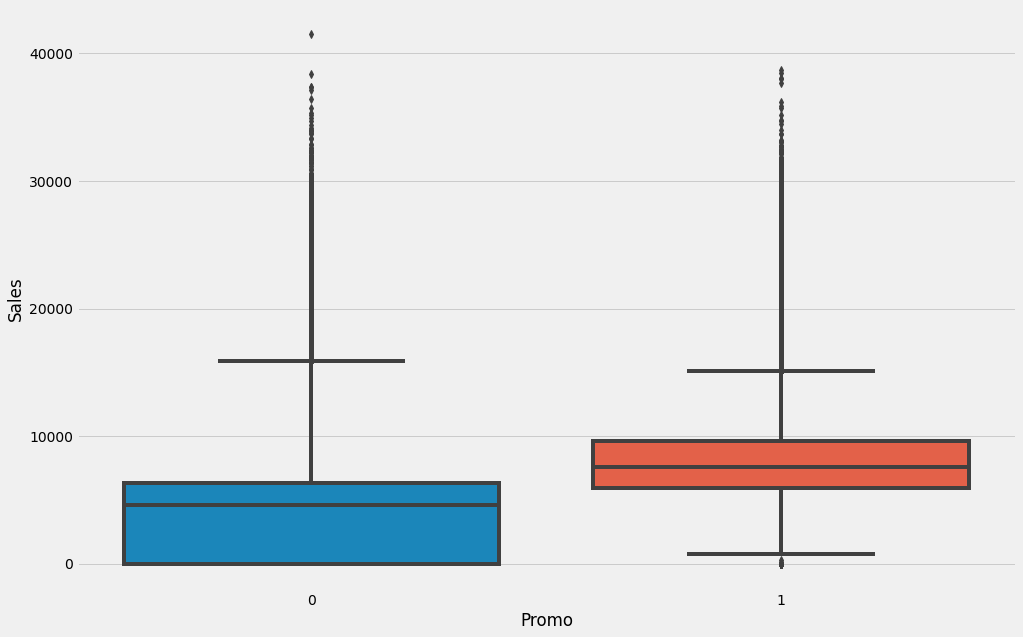

In [49]:
sns.boxplot(x="Promo",y="Sales",data=df)

Observation:
    
    For 'Promo' which is categorized into two variables, depiction of the boxplot corresponding to the raw values of sales does not reveal much information. We must re-express the sales. 

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

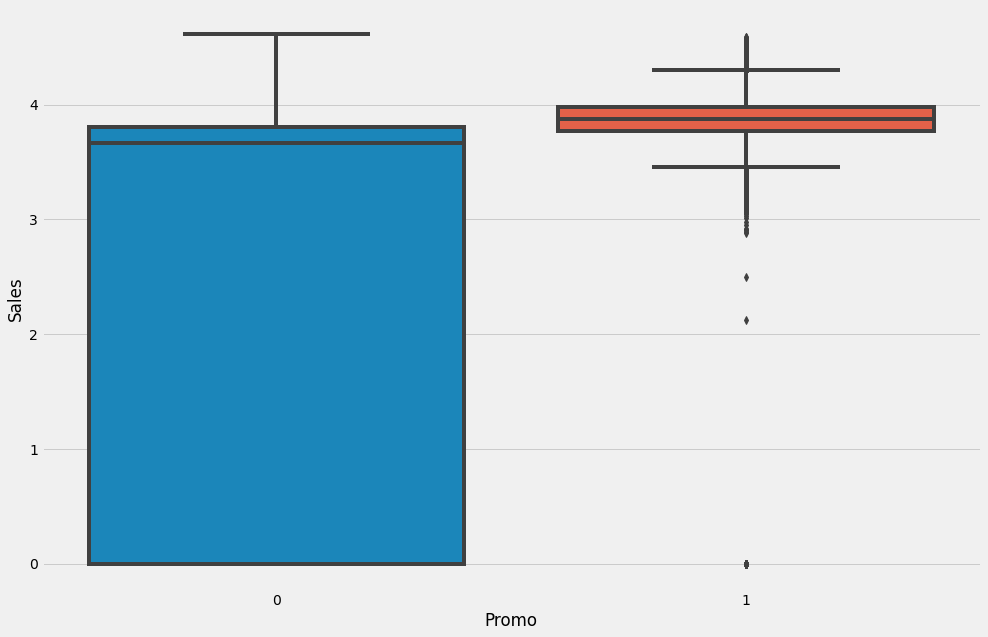

In [50]:
sns.boxplot(x = df['Promo'], y = np.log10(df['Sales'] + 1))

Observation:
    
    The boxplot still is of little use, it is because we haven't removed the zeros from the sales.

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

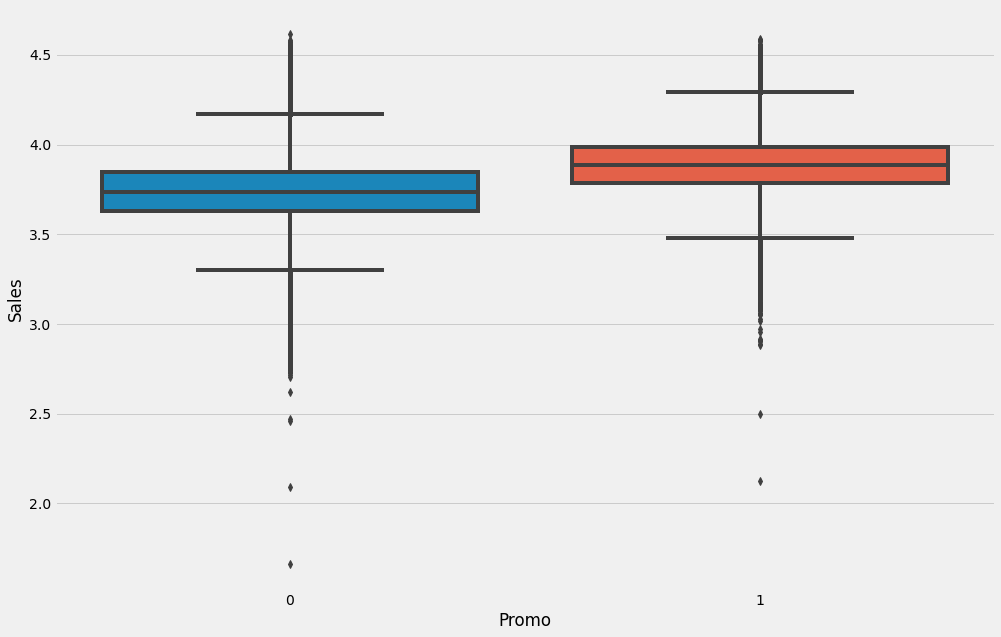

In [51]:
sns.boxplot(x = df[df['Sales'] > 0]['Promo'], y = np.log10(df[df['Sales'] > 0]['Sales']))

## 3. Day Of Week Vs Sales

Note:
    
    From here on we will always deal with the records where the no. of sales is
    greater than Zeros. Because By taking zeros on Sales it is giving very Huge impact.
    So,Lets make a variable for the same--

In [52]:
df1=df[df["Sales"] > 0].copy()

In [53]:
print("Counts of Day Of Week VS Sales:-")
print(df1[["DayOfWeek", "Sales"]].groupby(["DayOfWeek"])["Sales"].count())
print("-"*35)
print("Mean of Day Of Week VS Sales:-")
print(df1[["DayOfWeek","Sales"]].groupby(["DayOfWeek"])["Sales"].mean().sort_values())
print("-"*35)
print("Median of Day Of Week VS Sales:-")
print(df1[["DayOfWeek","Sales"]].groupby(["DayOfWeek"])["Sales"].median().sort_values())

Counts of Day Of Week VS Sales:-
DayOfWeek
1    137557
2    143955
3    141922
4    134626
5    138633
6    144052
7      3593
Name: Sales, dtype: int64
-----------------------------------
Mean of Day Of Week VS Sales:-
DayOfWeek
6    5875.084935
3    6728.786679
4    6768.214973
5    7073.034133
2    7088.409086
1    8216.252259
7    8224.723908
Name: Sales, dtype: float64
-----------------------------------
Median of Day Of Week VS Sales:-
DayOfWeek
6    5425.0
3    6210.0
4    6246.0
2    6502.0
5    6581.0
7    6876.0
1    7539.0
Name: Sales, dtype: float64


Observation:
    
    1) Mean Sales is Higest on the Day of Monday followed by Monday,Tuesday
    2) Median Sales is Higest on the Monday.
    

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

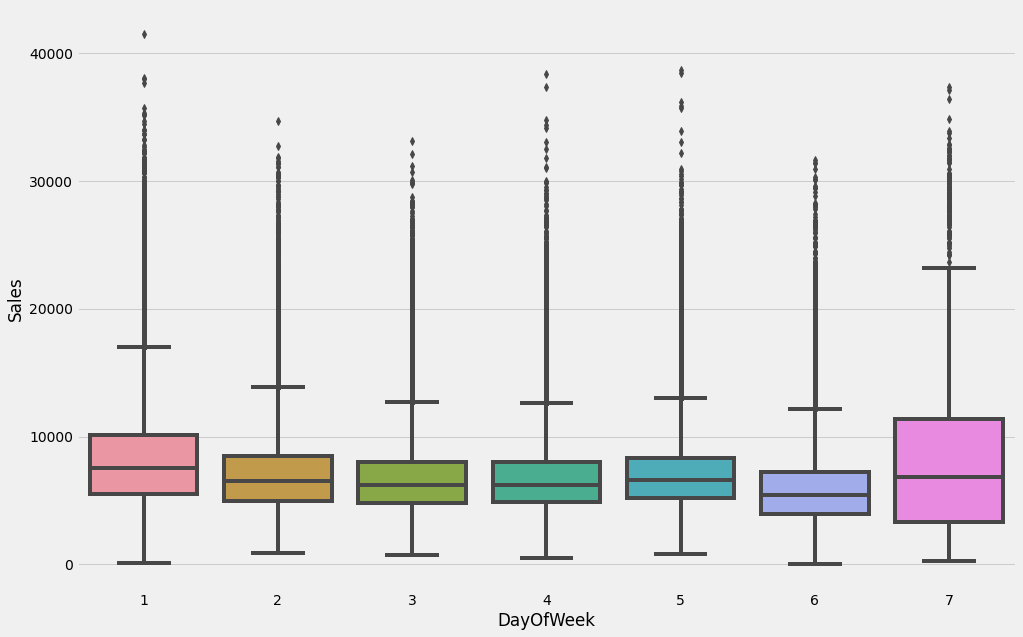

In [54]:
# Lets Check Raw sales:--  (here raw sales mean without using parameter like log,sqrt)

sns.boxplot(x=df1["DayOfWeek"],y=df1["Sales"])

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

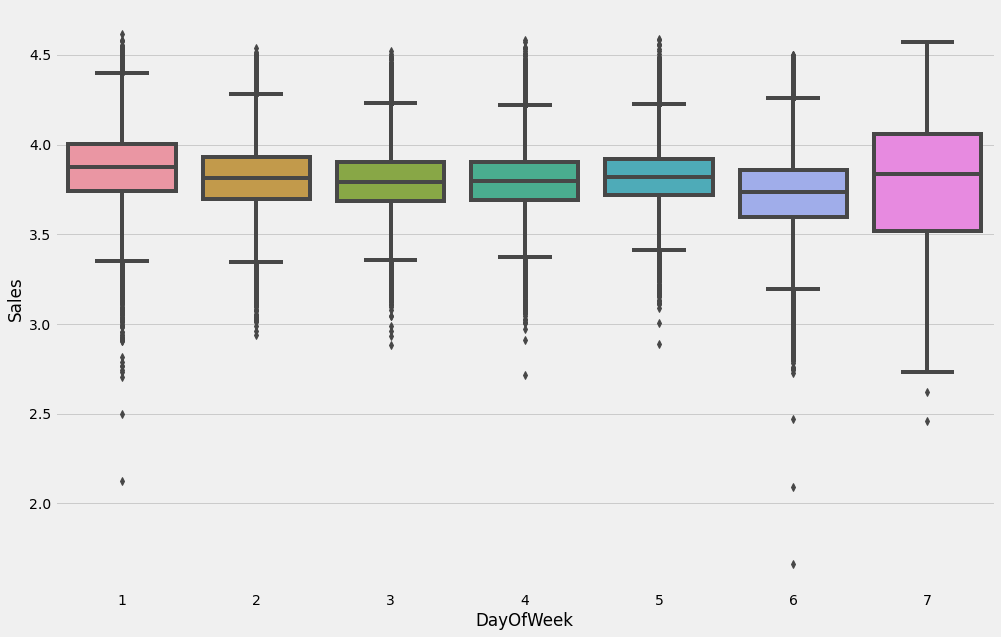

In [55]:
# Lets Check Sales in re-expressed with log10--
sns.boxplot(x=df1["DayOfWeek"],y=np.log10(df1["Sales"]))

Observation:

     1) The sales on Mondays appears to outnumber the corresponding figures for Tuesday through Saturday. 
     
     2) There's a sudden increase for Friday.
     
     3) The sales figures for Sunday is only second to that of Monday. But Sunday is underrepresented in the data. It is because we have not taken into consideration the records for which the sales is zero.
                               + + +
     Many of the stores are mostly closed on the Sundays. So, in removing these records, we have removed the data for many sundays too. 

## 4. Open Vs Sales

In [56]:
df1["Open"].value_counts()

1    844338
Name: Open, dtype: int64

Observation:
    
    Store is always open when the slaes is greater than zero.

## 5. State Holiday Vs Sales

In [57]:
df1['StateHoliday'].value_counts()

0    731308
0    112120
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [58]:
df1['StateHoliday'].value_counts(normalize = True)

0    0.866132
0    0.132790
a    0.000822
b    0.000172
c    0.000084
Name: StateHoliday, dtype: float64

Observation:
    
    1) State holidays are severly underrepresented, again this is perhaps when the corresponding sales are zero.
    
    2) 0 has higest no. of holiday in day (731308+112120=843428) and in Percentage (0.86+0.13=0.99) which is 99 %

    2) a = public holiday, b = Easter holiday, c = Christmas, 0 = None

In [59]:
print("Mean of State Holiday")
print(df1.groupby(["StateHoliday"])["Sales"].mean())
print("-"*35)
print("Median of State Holiday")
print(df1.groupby(["StateHoliday"])["Sales"].median())

Mean of State Holiday
StateHoliday
0    6702.687531
0    6992.483936
a    8487.471182
b    9887.889655
c    9743.746479
Name: Sales, dtype: float64
-----------------------------------
Median of State Holiday
StateHoliday
0    6164.0
0    6401.0
a    7556.0
b    8423.0
c    8397.0
Name: Sales, dtype: float64


Observation:

      b = Easter Holiday get didn't affected to the Sales.

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

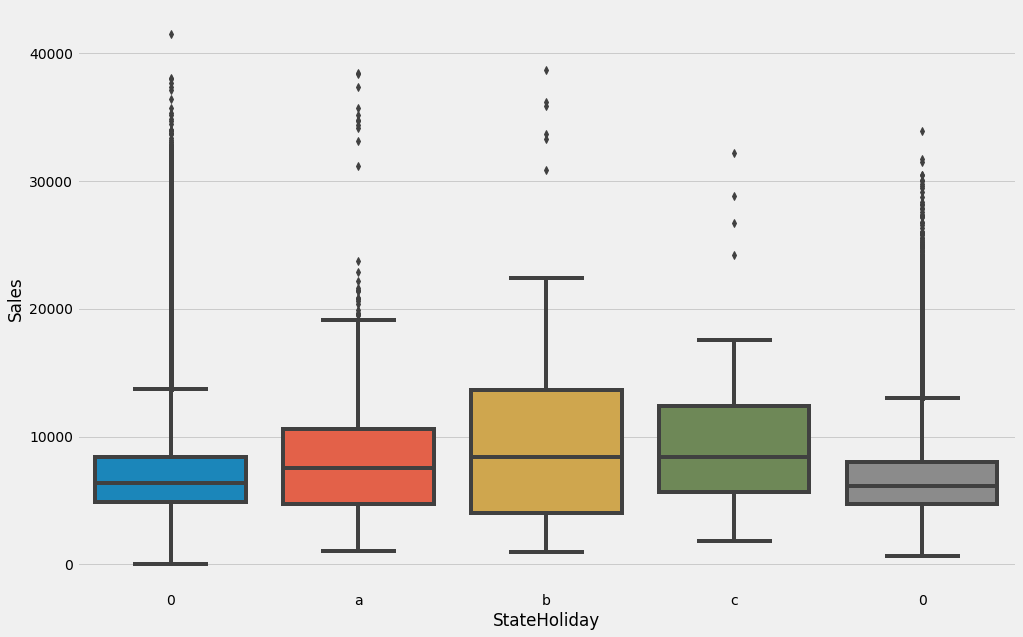

In [60]:
# Raw Sales --
sns.boxplot(x=df1["StateHoliday"],y=df1["Sales"])

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

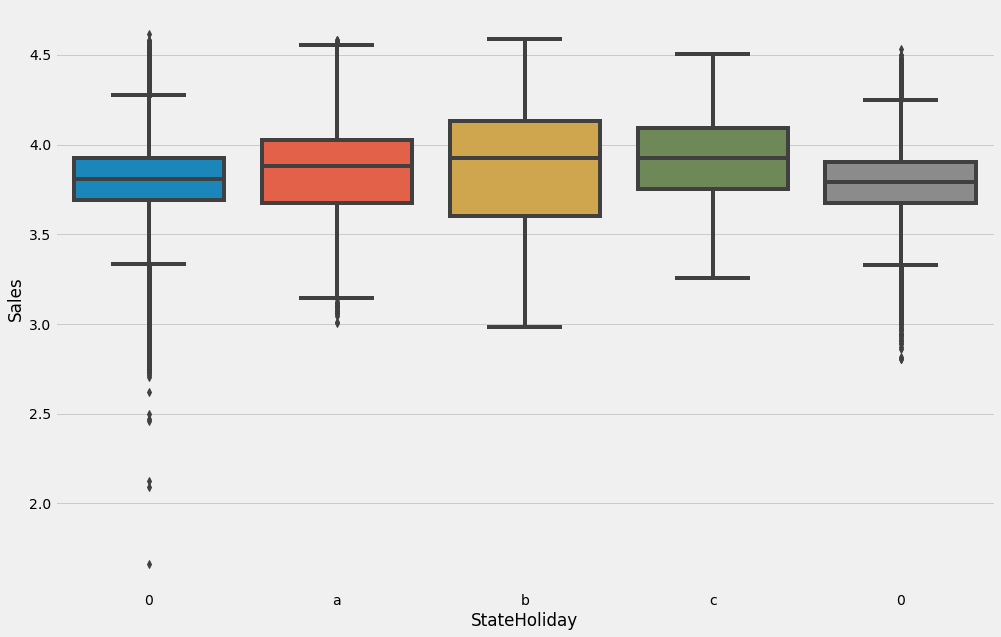

In [61]:
## Sales re-expressed in logarithm

sns.boxplot(x = df1['StateHoliday'], y = np.log10(df1['Sales']))

## 6. School Holiday Vs Sales

In [62]:
print(df1[["SchoolHoliday","Sales"]].groupby(["SchoolHoliday"])["Sales"].count())
print("-"*35)
print("Mean :--")
print(df1[["SchoolHoliday","Sales"]].groupby(['SchoolHoliday'])["Sales"].mean())
print("-"*35)
print("Median :---")
print(df1.groupby(["SchoolHoliday"])["Sales"].median())

SchoolHoliday
0    680893
1    163445
Name: Sales, dtype: int64
-----------------------------------
Mean :--
SchoolHoliday
0    6897.207830
1    7200.710282
Name: Sales, dtype: float64
-----------------------------------
Median :---
SchoolHoliday
0    6326.0
1    6562.0
Name: Sales, dtype: float64


observation:

      Both the mean and median sales is greater for when there is a school holiday. It means That School Holiday did not affect the sales.

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

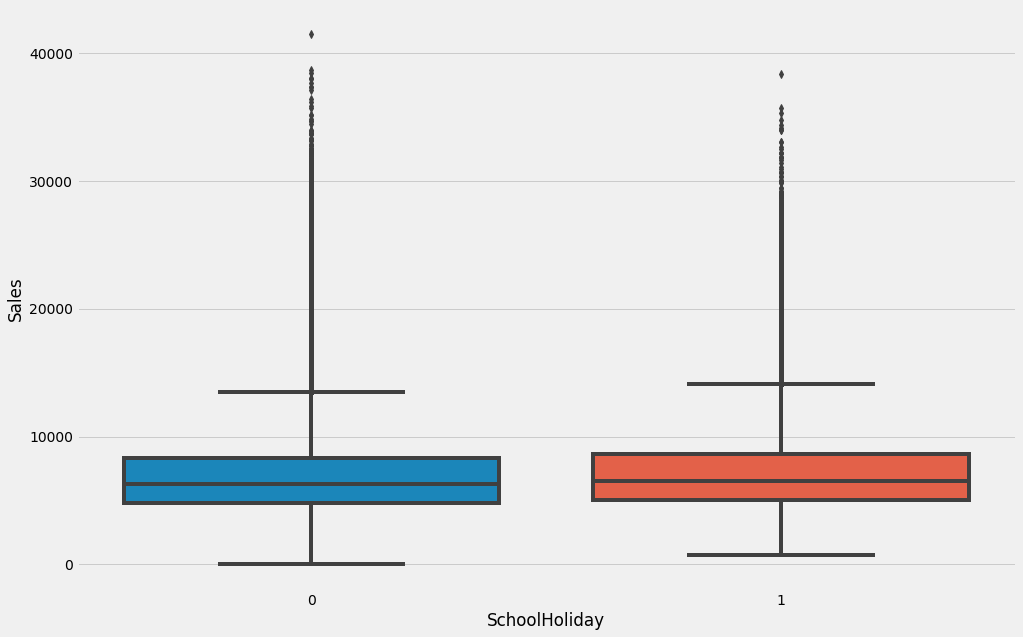

In [63]:
# Raw Sales in School Holiday:
sns.boxplot(x=df1["SchoolHoliday"],y=df1["Sales"])

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

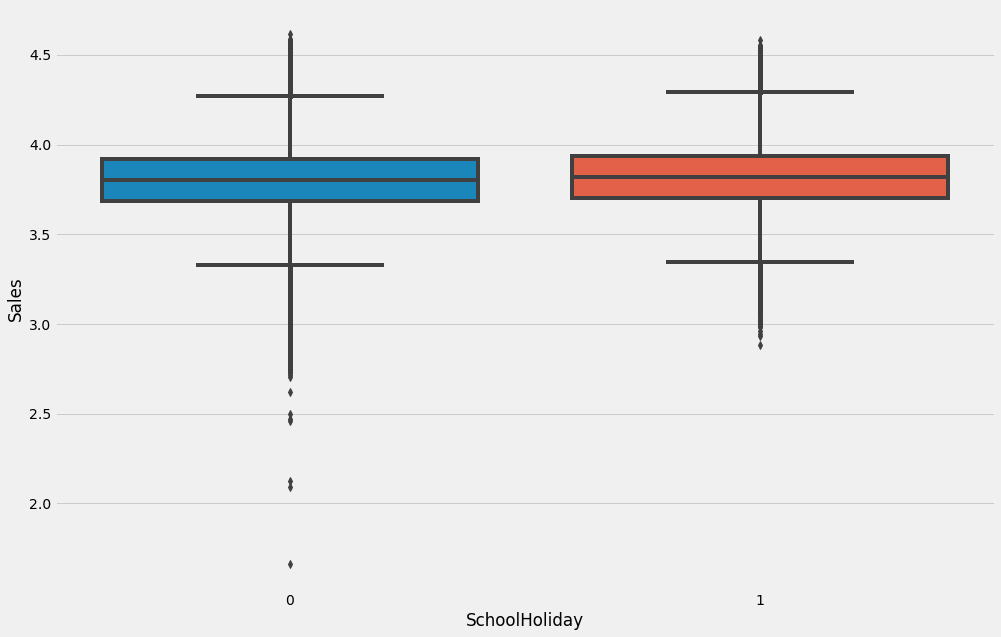

In [64]:
sns.boxplot(x=df1["SchoolHoliday"],y=np.log10(df1["Sales"]))

In [65]:
print("      When There is School Holiday")
print(df1[df1['SchoolHoliday'] == 1]['Sales'].describe(percentiles = [0.125, 0.25, 0.5, 0.75, 0.875]))
print("-"*35)
print("     When there is no school holiday")
print(df1[df1["SchoolHoliday"]==0]["Sales"].describe(percentiles=[0.125,0.25,0.5,0.75,0.875]))

      When There is School Holiday
count    163445.000000
mean       7200.710282
std        3175.816988
min         760.000000
12.5%      4146.000000
25%        5004.000000
50%        6562.000000
75%        8648.000000
87.5%     10574.000000
max       38367.000000
Name: Sales, dtype: float64
-----------------------------------
     When there is no school holiday
count    680893.000000
mean       6897.207830
std        3083.394165
min          46.000000
12.5%      3942.000000
25%        4826.000000
50%        6326.000000
75%        8293.000000
87.5%     10097.000000
max       41551.000000
Name: Sales, dtype: float64


# Stores DataSet

Notes:
    
    In order to analyze the data in this dataset alonside the sales data, we should merge both the datasets. But let's get some basic idea of the dataset

In [66]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [67]:
stores.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [68]:
stores.shape

(1115, 10)

## 1. StoresType

In [69]:
stores["StoreType"].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [70]:
stores["StoreType"].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

## 2. CompetitionDistance            

In [71]:
stores["CompetitionDistance"].describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Count'>

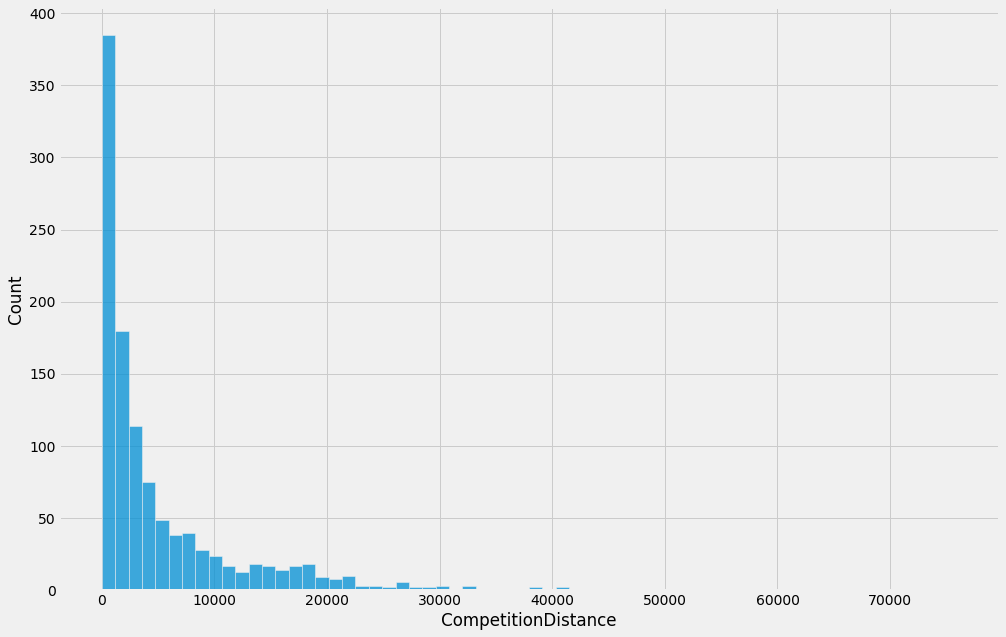

In [72]:
sns.histplot(stores["CompetitionDistance"])

Observation:
    
    Large no. of difference between the maximun and minimum so we will use log10 to transformation to understand easily

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Count'>

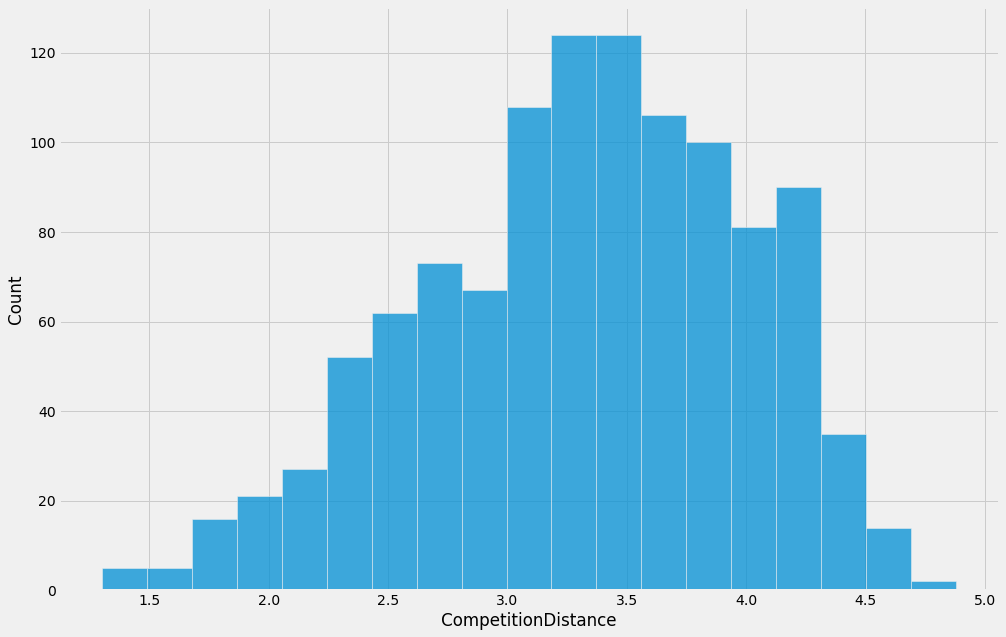

In [73]:
sns.histplot(np.log10(stores["CompetitionDistance"]))

<AxesSubplot:xlabel='CompetitionDistance'>

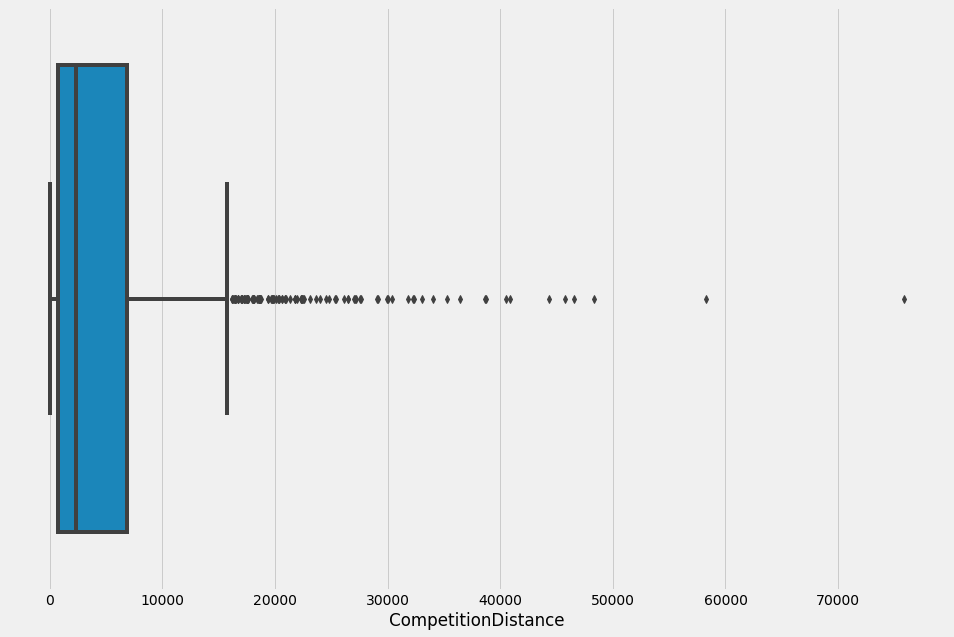

In [74]:
sns.boxplot(x = stores['CompetitionDistance'])

C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompetitionDistance'>

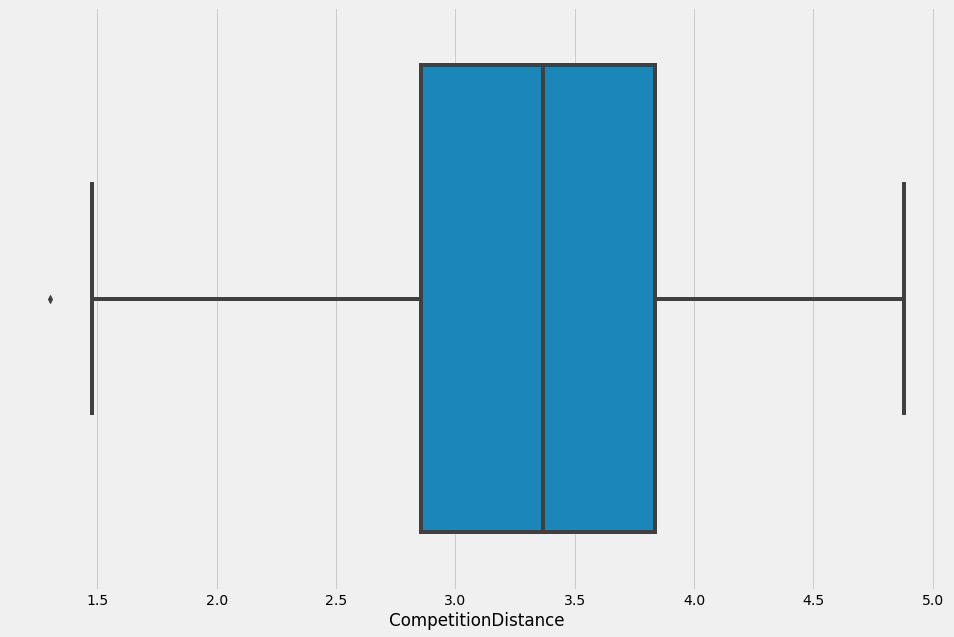

In [75]:
sns.boxplot(np.log10(stores['CompetitionDistance']))

## Deal with missing Value in Store DataSet

In [76]:
stores.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### 1. Competition Distance

In [77]:
stores["CompetitionDistance"].fillna(stores["CompetitionDistance"].mean(),inplace=True)

Why i use mean:
    
    1) Generally in Numerical Feature we should use mean(), but this is not a right way
    2) Here i used mean because i didn't have much domain knowledge regrading this dataset .so, i use mean 

### 2. Competition Open SinceMonth

In [78]:
stores['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [79]:
stores['CompetitionOpenSinceMonth'].isna().sum()

354

notes:
    
    1) for as many as 354 stores, the approximate month in which the competitor was established is not known.
    2) it is not a numeric columns it is a month wise.
    3) The correct way to replace it with Mode but may affect the other data so i will drop the columns.

In [80]:
stores.drop(['CompetitionOpenSinceMonth'],axis=1,inplace=True)

### 3. Competition Open Since Year     

In [81]:
stores.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [82]:
stores.CompetitionOpenSinceYear.isnull().sum()

354

In [83]:
# drop the feature
stores.drop(["CompetitionOpenSinceYear"],axis=1,inplace=True)

### 4. Promo2Since Week , Promo2SinceYear and Promo Interval

In [84]:
stores['Promo2SinceWeek'].fillna(0.0, inplace = True)
stores['Promo2SinceYear'].fillna(0.0, inplace = True)

In [85]:
stores['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [86]:
stores['PromoInterval'].isnull().sum()

544

In [87]:
stores['PromoInterval'].fillna('unk', inplace = True)

Note:
    
    in Promo Interval it will be hard to take mode because only three unique value are there and we will lost data if we drop it. so, we are taking "unk" that is unknown as that we could easily understand it

In [88]:
stores.isna().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
Promo2SinceWeek        0
Promo2SinceYear        0
PromoInterval          0
dtype: int64

In [89]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,0,0.0,0.0,unk
1,2,a,a,570.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,0,0.0,0.0,unk
4,5,a,a,29910.0,0,0.0,0.0,unk


# Feature Engineering on Stores Dataset

why to do so:
    
    The categorical variables should be converted into dummy variables. Why? Because all of them are cardinal, i.e. not ordered.
    
    Also, for the dummies, one category has to be removed - technically allowed to be subsumed by the intercept. Why? Because, I intend to use linear regression model, i.e. a least squares model. When we make dummies for all the categories, the data fosters singularity. Say, for instance, we have 3 categories in a variable. If we make dummies of two of them, the third variable becomes predictable - by using the first two dummies.

    However, we'll do that later. For now, let's keep all the dummies so that it is subservient for us to analyze the data with the sales variable.

In [90]:
stores = pd.get_dummies(stores, columns = ['StoreType', 'Assortment', 'PromoInterval'], 
                        prefix = ['StoreType', 'Assortment', 'PromoInt'])
stores.tail()

,Store,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInt_Feb,May,Aug,Nov","PromoInt_Jan,Apr,Jul,Oct","PromoInt_Mar,Jun,Sept,Dec",PromoInt_unk
1110,1111,1900.0,1,31.0,2013.0,1,0,0,0,1,0,0,0,1,0,0
1111,1112,1880.0,0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1
1112,1113,9260.0,0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1
1113,1114,870.0,0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1
1114,1115,5350.0,1,22.0,2012.0,0,0,0,1,0,0,1,0,0,1,0


In [91]:
stores.drop("Promo2",axis=1,inplace=True)

# Feature Engineering on Sales Dataset

In [92]:
## Keep only the records for which the sales is greater than 0
## Remove the 'Open' variable as it is always 1 for when sales > 0

df=df[df["Sales"] > 0]
df.drop("Open",axis=1,inplace=True)

In [93]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1
1017190,1097,2,2013-01-01,5961,1405,0,a,1


In [94]:
## Make dummies for the "StateHoliday" 
## and the "DayOfWeek" variable.

df=pd.get_dummies(df,columns=['StateHoliday', 'DayOfWeek'],drop_first=True)

### Date is a Temporal Variable so we have to Change it to Month and Year

In [95]:
df["Year"]=df["Date"].apply(lambda x: x.year)
df["Month"]=df["Date"].apply(lambda x: x.month)

In [96]:
## Drop the "Date" variable now

df.drop("Date", axis = 1, inplace = True)

In [97]:
df.head()

,Store,Sales,Customers,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Year,Month
0,1,5263,555,1,1,1,0,0,0,0,0,0,1,0,0,2015,7
1,2,6064,625,1,1,1,0,0,0,0,0,0,1,0,0,2015,7
2,3,8314,821,1,1,1,0,0,0,0,0,0,1,0,0,2015,7
3,4,13995,1498,1,1,1,0,0,0,0,0,0,1,0,0,2015,7
4,5,4822,559,1,1,1,0,0,0,0,0,0,1,0,0,2015,7


<AxesSubplot:xlabel='Month'>

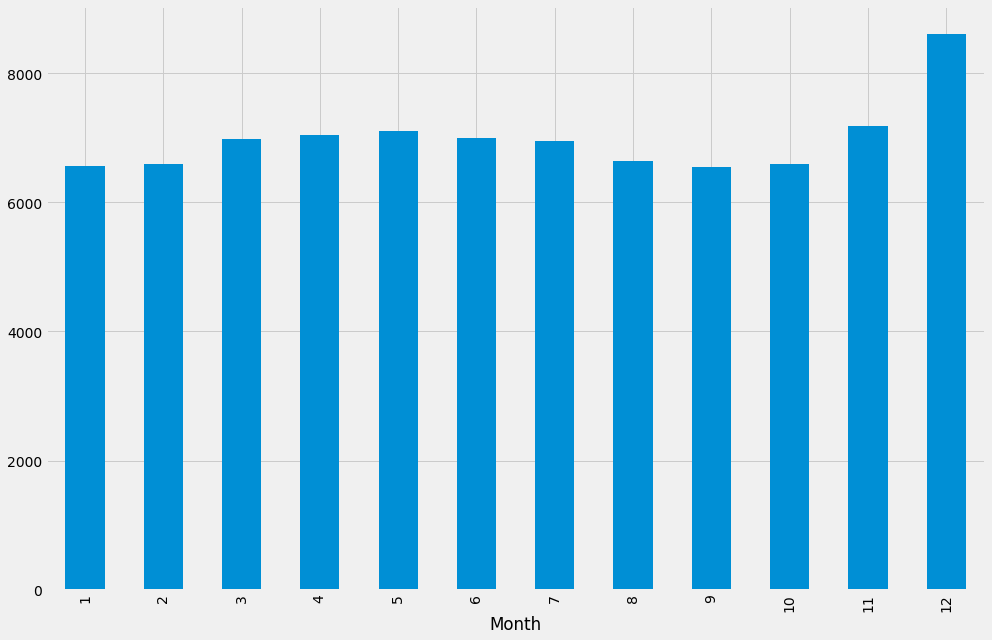

In [98]:
# Analysis of month with sales
df.groupby(["Month"])["Sales"].mean().plot(kind="bar")

<AxesSubplot:xlabel='Month', ylabel='Sales'>

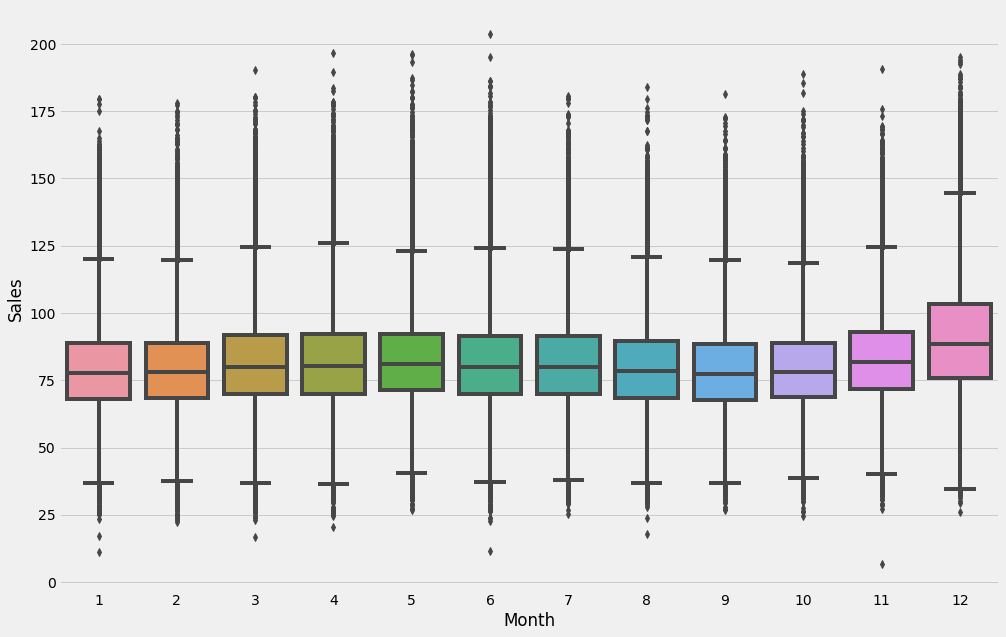

In [99]:
sns.boxplot(x=df["Month"],y=np.sqrt(df["Sales"]))

observation:
    
    Apparently, the sales increase gradually from the start of the month until May from when it starts decreasing at the same pace making an even steep at the month of May. The sales decrease until October when it is almost at the same level as in January and from then increases at a higher rate until the end of the year when the mean sales cross the 8000 mark.

<AxesSubplot:xlabel='Year'>

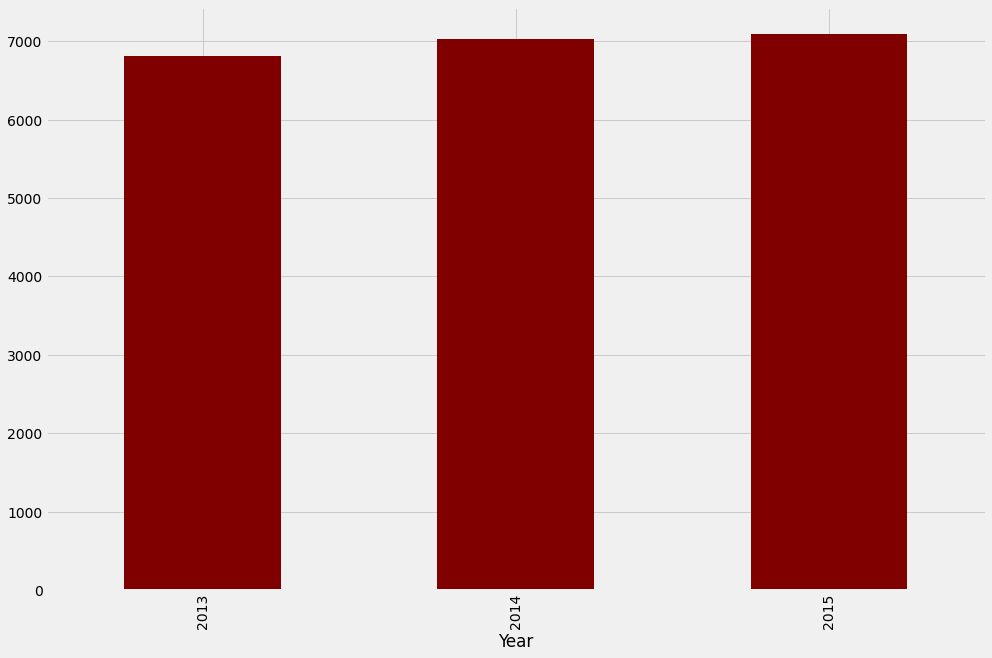

In [100]:
## Analyzing the years against sales

df.groupby(['Year'])['Sales'].mean().plot(kind = 'bar', color = 'maroon')

<AxesSubplot:xlabel='Year', ylabel='Sales'>

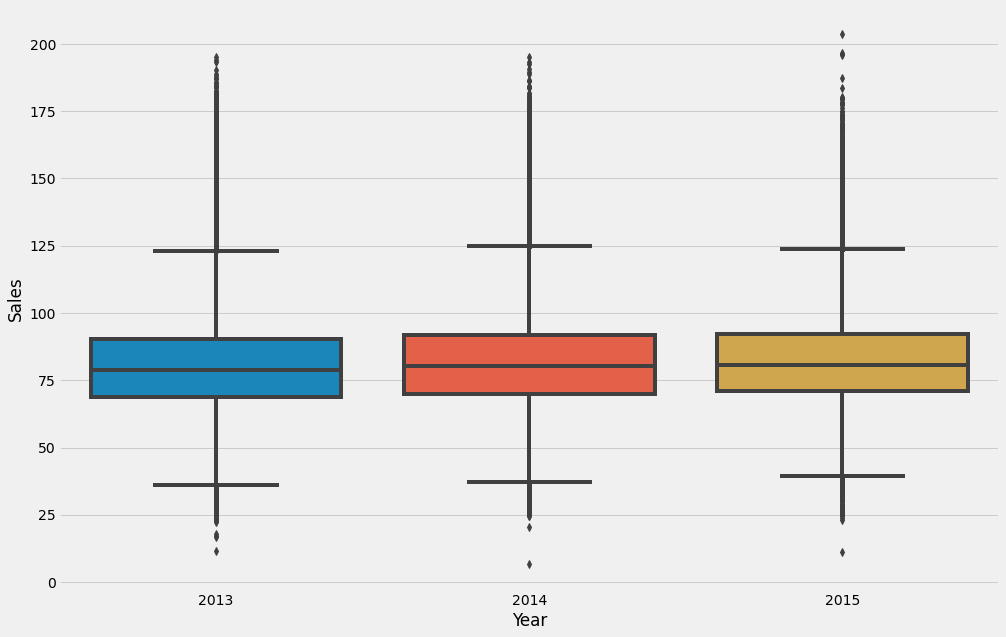

In [101]:
sns.boxplot(x = df['Year'], y = np.sqrt(df['Sales']))

Onservation:
    
    The mean sales has incremented each year, at a higher rate from 2013 to 14 and at a comparatively slower rate from 2014-15.

## Merging two Dataframe (df + stores)

In [102]:
df.head(3)

,Store,Sales,Customers,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Year,Month
0,1,5263,555,1,1,1,0,0,0,0,0,0,1,0,0,2015,7
1,2,6064,625,1,1,1,0,0,0,0,0,0,1,0,0,2015,7
2,3,8314,821,1,1,1,0,0,0,0,0,0,1,0,0,2015,7


In [103]:
stores.head(3)

,Store,CompetitionDistance,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInt_Feb,May,Aug,Nov","PromoInt_Jan,Apr,Jul,Oct","PromoInt_Mar,Jun,Sept,Dec",PromoInt_unk
0,1,1270.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,1
1,2,570.0,13.0,2010.0,1,0,0,0,1,0,0,0,1,0,0
2,3,14130.0,14.0,2011.0,1,0,0,0,1,0,0,0,1,0,0


In [104]:
# Merging = df + stores

df=pd.merge(df,stores,on="Store")
df.drop("Store",axis=1,inplace=True)

In [105]:
df.tail()

,Sales,Customers,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,DayOfWeek_2,DayOfWeek_3,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInt_Feb,May,Aug,Nov","PromoInt_Jan,Apr,Jul,Oct","PromoInt_Mar,Jun,Sept,Dec",PromoInt_unk
844333,9291,1002,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
844334,2748,340,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
844335,4202,560,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
844336,4580,662,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
844337,5076,672,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [106]:
df.shape

(844338, 30)

In [107]:
df.columns

Index(['Sales', 'Customers', 'Promo', 'SchoolHoliday', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Year', 'Month', 'CompetitionDistance',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'PromoInt_Feb,May,Aug,Nov', 'PromoInt_Jan,Apr,Jul,Oct',
       'PromoInt_Mar,Jun,Sept,Dec', 'PromoInt_unk'],
      dtype='object')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sales                      844338 non-null  int64  
 1   Customers                  844338 non-null  int64  
 2   Promo                      844338 non-null  int64  
 3   SchoolHoliday              844338 non-null  int64  
 4   StateHoliday_0             844338 non-null  uint8  
 5   StateHoliday_a             844338 non-null  uint8  
 6   StateHoliday_b             844338 non-null  uint8  
 7   StateHoliday_c             844338 non-null  uint8  
 8   DayOfWeek_2                844338 non-null  uint8  
 9   DayOfWeek_3                844338 non-null  uint8  
 10  DayOfWeek_4                844338 non-null  uint8  
 11  DayOfWeek_5                844338 non-null  uint8  
 12  DayOfWeek_6                844338 non-null  uint8  
 13  DayOfWeek_7                84

In [109]:
df.drop(['StoreType_a', 'Assortment_a', 'PromoInt_unk'], axis = 1, inplace = True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sales                      844338 non-null  int64  
 1   Customers                  844338 non-null  int64  
 2   Promo                      844338 non-null  int64  
 3   SchoolHoliday              844338 non-null  int64  
 4   StateHoliday_0             844338 non-null  uint8  
 5   StateHoliday_a             844338 non-null  uint8  
 6   StateHoliday_b             844338 non-null  uint8  
 7   StateHoliday_c             844338 non-null  uint8  
 8   DayOfWeek_2                844338 non-null  uint8  
 9   DayOfWeek_3                844338 non-null  uint8  
 10  DayOfWeek_4                844338 non-null  uint8  
 11  DayOfWeek_5                844338 non-null  uint8  
 12  DayOfWeek_6                844338 non-null  uint8  
 13  DayOfWeek_7                84

In [113]:
df.columns

Index(['Sales', 'Customers', 'Promo', 'SchoolHoliday', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Year', 'Month', 'CompetitionDistance',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c',
       'PromoInt_Feb,May,Aug,Nov', 'PromoInt_Jan,Apr,Jul,Oct',
       'PromoInt_Mar,Jun,Sept,Dec'],
      dtype='object')

## Machine Learning Regression Model

In [112]:
data_copy=df.copy()  # let the dataset copy for future

In [114]:
x=data_copy.drop(["Sales"],axis=1)

In [116]:
y=data_copy["Sales"]

In [118]:
x.head(3)

,Customers,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,...,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInt_Feb,May,Aug,Nov","PromoInt_Jan,Apr,Jul,Oct","PromoInt_Mar,Jun,Sept,Dec"
0,555,1,1,1,0,0,0,0,0,0,...,0.0,0.0,0,1,0,0,0,0,0,0
1,546,1,1,1,0,0,0,0,0,1,...,0.0,0.0,0,1,0,0,0,0,0,0
2,523,1,1,1,0,0,0,0,1,0,...,0.0,0.0,0,1,0,0,0,0,0,0


In [117]:
y

0         5263
1         5020
2         4782
3         5011
4         6102
          ... 
844333    9291
844334    2748
844335    4202
844336    4580
844337    5076
Name: Sales, Length: 844338, dtype: int64

In [119]:
# Train Test Split:--

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=103)

## Linear Regression

In [123]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [124]:
prediction=lr.predict(x_test)

In [125]:
lr.score(x_train,y_train)

0.8334114234297179

In [126]:
lr.score(x_test,y_test)

0.8303118060179111

Observation:

      This will be Consider as a good model because our Traing and Testing accuracy is similar with 83%.

In [128]:
pd.DataFrame({"Columns":x.columns,"Coefficient": lr.coef_})

,Columns,Coefficient
0,Customers,7.315898
1,Promo,1270.455315
2,SchoolHoliday,123.340235
3,StateHoliday_0,179.881060
4,StateHoliday_a,318.684108
5,StateHoliday_b,-31.082626
6,StateHoliday_c,2908.893953
7,DayOfWeek_2,-475.453507
8,DayOfWeek_3,-618.517944
9,DayOfWeek_4,-696.030894


Note :
    
    we can do DecisionTree Regresson but for that we also have to your RandomSearchCV or GridSearchCV also and my System Processor is very less so it will take very large amount of Time so i am not doing that on real-time Data Set. Hope You Understand that and after that we will export our model in pkl file for future uses.